Variables

1. UG - a list of n languages, Li to Ln, each laanguage has its own freq, fitness
   - freq xi
   - fitness fi = sum(xi*F_ij), j from 1 to n

2. F_ij - success speaking communication prob between Li & Lj 
   - F_ij = 0.5 * (a_ij+b_ij)

3. F_ii - success speaking communication prob inside Li
   - F_ii = (1-alpha_i) * (1-beta_i); F_ii = a_ii

4. Q_ij - prob that a learner use Li learned Lj

5. lc (linguistic coherence) - average fitness of the population

Practical assumptions
   - F - a matrix of F_ij (random num from an uniform distribution of [0,1]), size n*n
     - used as similarity, assume no relationship b/t F_ij and F_ii
   - Q - a matrix of Q_ij (random num from an uniform distribution of [0,1]), size n*n
   - P - a list of n freq, xi to xn, size 1*n 

In [1198]:
import numpy as np

# fuction simulate_language_dynamics() simulates the dynamics of a population of languages
# imput: n_values, which is a list of languages in the UG
# output: lc_values
def simulate_language_dynamics(n_values):
    lc_values = []
    
    # test
    dfreq_dict = {}

    # loop over different UG sizes
    for n in n_values:
        # # initialize variables
        # F = np.random.uniform(0, 1, (n, n))  # success speaking communication probabilities, here assume no relation b/t F_ii and F_ij
        # np.fill_diagonal(F, 1.0)  # set all F_ii = 1
        # Q = np.random.uniform(0, 1, (n, n))  # prob of learner using language learned
        # np.fill_diagonal(Q, 1.0)  # set all Q_ii = 1
        # # normalize each column of Q (ensure each learner uses a language)
        # Q /= Q.sum(axis=1, keepdims=True)
        # freq = np.full(n, 1/n)

        F = np.random.uniform(0, 1, (n, n))
        np.fill_diagonal(F, 1.0)  # Ensure direct communication is always successful
        F = (F + F.T) / 2  # Make F symmetric
        
        # Q = np.random.uniform(0, 1, (n, n))
        # np.fill_diagonal(Q, 1.0)  # set all Q_ii = 1
        # Q /= Q.sum(axis=1, keepdims=True)  # Normalize each row of Q
        
        Q = np.random.uniform(0, 1, (n, n))
        diagonal = np.diag(Q)
        new_diagonal = diagonal + 10
        np.fill_diagonal(Q, new_diagonal)
        Q /= Q.sum(axis=1, keepdims=True)  # Normalize each row of Q

        #freq = np.full(n, 1/n)  # Start with equal frequency for each language
        freq = np.random.uniform(0, 1, n)
        freq /= np.sum(freq)  # Normalize frequencies

        # test
        generation_dfreq = []

        # iterate over N = 100 gen (sentences) for each UG, get the lc_value
        dfreq = np.zeros(n)
        for i in range(100):
            # set time step
            dt = 0.5
            # cal current fitness and phi
            fitness = freq @ F
            phi = np.sum(fitness * freq)

            # update freq change according to the dynamic function
            for j in range(n):
                sum_fi_Qij_xi = np.sum(fitness * Q[:, j] * freq)
                dfreq[j] = (sum_fi_Qij_xi - phi * freq[j]) * dt
            
            #print(np.sum(dfreq))

            # update the freq according to the change
            for j in range(n):
                freq[j] += dfreq[j]
            # normalize the freq
            # freq /= np.sum(freq)

            # test
            generation_dfreq.append(dfreq)

            # calculate lc for this n
            lc = calc_lc(freq, F)

        # test
        dfreq_dict[n] = generation_dfreq
        
        lc_values.append(lc)
    
    return lc_values, dfreq_dict


# function calc_lc() calculates the linguistic coherence of a population of languages
# input: freq, F
# output: lc
def calc_lc(freq, F):
    # vector of fitness for each language
    fitness = freq @ F  
    # linguistic coherence as average fitness of the population
    lc = np.sum(fitness * freq) 

    return lc


# main function
def main():
    # run_ simulation
    n_values = range(1, 51)
    lc_values, dfreq_dict = simulate_language_dynamics(n_values)

    # output results
    for i, lc in enumerate(lc_values, 1):
        print(f"n = {i}: lc = {lc:.3f}")

    # Open file for output
    with open("simulation_dfreq_results.txt", "w") as file:
        # Output results
        for i, lc in enumerate(lc_values, 1):
            file.write(f"n = {i}: lc = {lc:.3f}\n")
            file.write(f"  dfreq changes for all generations for n = {i}:\n")
            for gen, dfreq in enumerate(dfreq_dict[i], 1):
                dfreq_str = ', '.join(f"{change:.4f}" for change in dfreq)  # Format dfreq nicely
                file.write(f"    Generation {gen}: [{dfreq_str}]\n")

if __name__ == "__main__":
    main()

n = 1: lc = 1.000
n = 2: lc = 0.921
n = 3: lc = 0.807
n = 4: lc = 0.750
n = 5: lc = 0.819
n = 6: lc = 0.621
n = 7: lc = 0.648
n = 8: lc = 0.608
n = 9: lc = 0.728
n = 10: lc = 0.661
n = 11: lc = 0.599
n = 12: lc = 0.583
n = 13: lc = 0.581
n = 14: lc = 0.563
n = 15: lc = 0.558
n = 16: lc = 0.550
n = 17: lc = 0.537
n = 18: lc = 0.548
n = 19: lc = 0.547
n = 20: lc = 0.540
n = 21: lc = 0.565
n = 22: lc = 0.532
n = 23: lc = 0.525
n = 24: lc = 0.532
n = 25: lc = 0.529
n = 26: lc = 0.521
n = 27: lc = 0.523
n = 28: lc = 0.532
n = 29: lc = 0.535
n = 30: lc = 0.521
n = 31: lc = 0.523
n = 32: lc = 0.521
n = 33: lc = 0.527
n = 34: lc = 0.531
n = 35: lc = 0.519
n = 36: lc = 0.527
n = 37: lc = 0.520
n = 38: lc = 0.523
n = 39: lc = 0.505
n = 40: lc = 0.508
n = 41: lc = 0.518
n = 42: lc = 0.516
n = 43: lc = 0.519
n = 44: lc = 0.506
n = 45: lc = 0.524
n = 46: lc = 0.508
n = 47: lc = 0.517
n = 48: lc = 0.507
n = 49: lc = 0.508
n = 50: lc = 0.505


In [1199]:
import numpy as np

# Function simulate_language_dynamics() simulates the dynamics of a population of languages
# Input: n_values, which is a list of sizes of the Universal Grammar (UG)
# Output: lc_values, the linguistic coherences
def simulate_language_dynamics(n_values):
    lc_values = []
    
    for n in n_values:
        F = np.random.uniform(0, 1, (n, n))
        np.fill_diagonal(F, 1.0)  # Ensure direct communication is always successful
        F = (F + F.T) / 2  # Make F symmetric
        
        Q = np.random.uniform(0, 1, (n, n))
        diagonal = np.diag(Q)
        new_diagonal = diagonal + 10
        np.fill_diagonal(Q, new_diagonal)
        Q /= Q.sum(axis=1, keepdims=True)  # Normalize each row of Q

        #freq = np.full(n, 1/n)  # Start with equal frequency for each language
        freq = np.random.uniform(0, 1, n)
        freq /= np.sum(freq)  # Normalize frequencies

        for _ in range(100):  # Iterate over 100 generations
            dt = 0.5
            fitness = freq @ F
            phi = np.sum(fitness * freq)

            dfreq = np.zeros(n)
            for j in range(n):
                sum_fi_Qij_xi = np.sum(fitness * Q[:, j] * freq)
                dfreq[j] = (sum_fi_Qij_xi - phi * freq[j]) * dt

            freq += dfreq

        lc = np.sum(freq * (freq @ F))  # Compute linguistic coherence at end of simulation
        lc_values.append(lc)

        #print(fitness)
    
    return lc_values

# Main function that runs the simulation and writes results to a file
def main():
    # 1 simulation result
    # # Run simulation
    # n_values = range(1, 51)
    # lc_values = simulate_language_dynamics(n_values)

    # # Open file for output
    # with open("test.txt", "w") as file:
    #     # Output only the values of n and corresponding lc
    #     for n, lc in zip(n_values, lc_values):
    #         file.write(f"n = {n}: lc = {lc:.3f}\n")

    # multi simulation result
    # Define the number of simulations
    num_simulations = 3
    # Define the range of n values
    n_values = range(1, 51)

    # Open file for output, move file opening outside the simulation loop
    with open("test.txt", "w") as file:
        for sim in range(num_simulations):
            # Run simulation
            lc_values = simulate_language_dynamics(n_values)

            # # Add simulation header
            # file.write(f"Simulation {sim + 1}\n")
            
            # Output only the values of n and corresponding lc
            for n, lc in zip(n_values, lc_values):
                file.write(f"n = {n}: lc = {lc:.3f}\n")


if __name__ == "__main__":
    main()


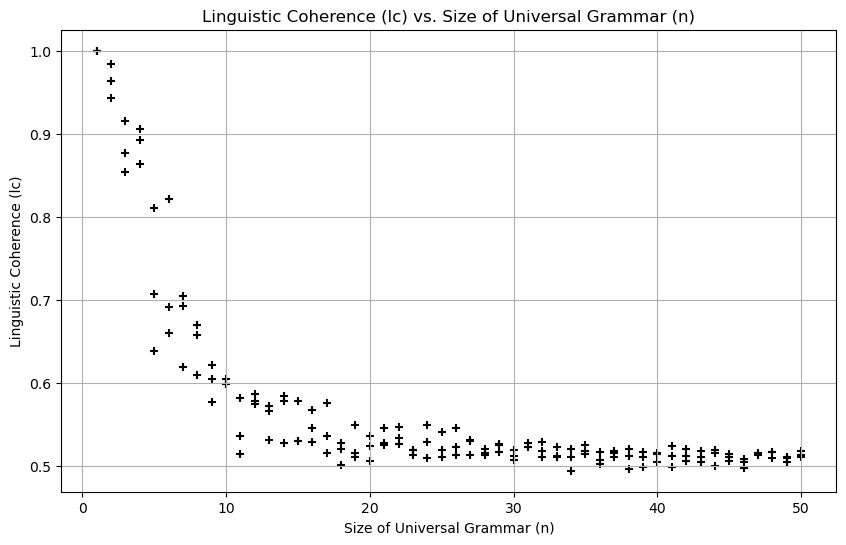

In [1200]:
import matplotlib.pyplot as plt

def read_lc_values(filename):
    n_values = []
    lc_values = []
    with open(filename, 'r') as file:
        for line in file:
            # Assuming the format is "n = {n}: lc = {lc}"
            parts = line.strip().split(':')
            n = int(parts[0].split('=')[1].strip())
            lc = float(parts[1].split('=')[1].strip())
            n_values.append(n)
            lc_values.append(lc)
    return n_values, lc_values

def plot_lc_vs_n(n_values, lc_values):
    plt.figure(figsize=(10, 6))
    plt.scatter(n_values, lc_values, marker='+', color='black')
    plt.title('Linguistic Coherence (lc) vs. Size of Universal Grammar (n)')
    plt.xlabel('Size of Universal Grammar (n)')
    plt.ylabel('Linguistic Coherence (lc)')
    plt.grid(True)
    plt.show()

def main():
    filename = 'test.txt'  # Replace with your actual file path
    n_values, lc_values = read_lc_values(filename)
    plot_lc_vs_n(n_values, lc_values)

if __name__ == "__main__":
    main()

In [1201]:
# cal converge gen for each n

import numpy as np

# Function simulate_language_dynamics() simulates the dynamics of a population of languages
# Input: n_values, which is a list of sizes of the Universal Grammar (UG)
# Output: lc_values, the linguistic coherences
def simulate_language_dynamics(n):
    F = np.random.uniform(0, 1, (n, n))
    np.fill_diagonal(F, 1.0)  # Ensure direct communication is always successful
    F = (F + F.T) / 2  # Make F symmetric
    
    Q = np.random.uniform(0, 1, (n, n))
    diagonal = np.diag(Q)
    new_diagonal = diagonal + 1
    np.fill_diagonal(Q, new_diagonal)
    Q /= Q.sum(axis=1, keepdims=True)  # Normalize each row of Q

    #freq = np.full(n, 1/n)  # Start with equal frequency for each language
    freq = np.random.uniform(0, 1, n)
    freq /= np.sum(freq)  # Normalize frequenciese

    for i in range(300):  # Iterate over 100 generations
        dt = 0.5
        fitness = freq @ F
        phi = np.sum(fitness * freq)

        dfreq = np.zeros(n)
        for j in range(n):
            sum_fi_Qij_xi = np.sum(fitness * Q[:, j] * freq)
            dfreq[j] = (sum_fi_Qij_xi - phi * freq[j]) * dt

        freq += dfreq

        if dfreq.max() < 0.00001:
            con_gen = i
            # print(f"Converged at generation {i}")
            break
        
    return con_gen

# Main function that runs the simulation and writes results to a file
def main():
    n_values = range(1, 51)
    results = []

    # Open file for output
    with open("convergence_results.txt", "w") as file:
        for n in n_values:
            gen = simulate_language_dynamics(n)
            if gen is not None:
                file.write(f"n = {n}: Converged at generation {gen}\n")
                results.append((n, gen))
            else:
                file.write(f"n = {n}: Did not converge within 1000 generations\n")


if __name__ == "__main__":
    main()


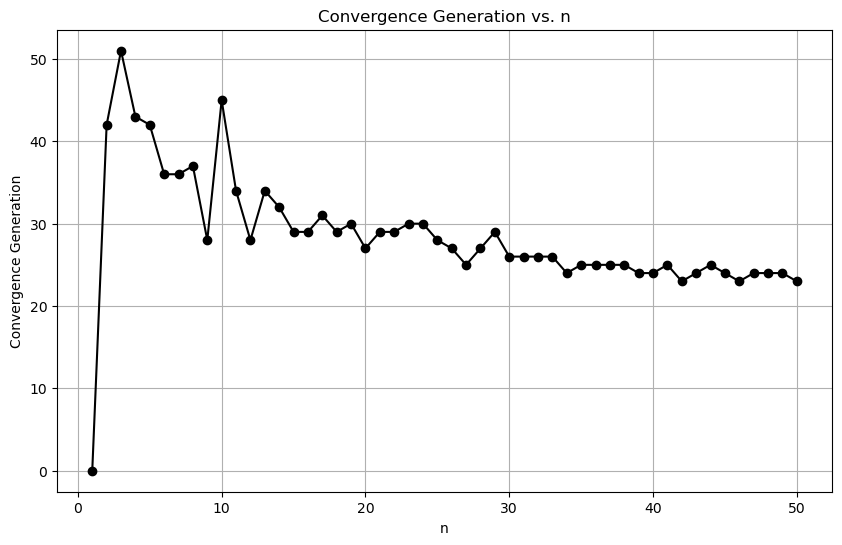

In [1202]:
import matplotlib.pyplot as plt

# Function to read data from file
def read_convergence_data(filepath):
    n_values = []
    convergence_generations = []
    with open(filepath, 'r') as file:
        for line in file:
            parts = line.strip().split(':')
            if len(parts) == 2:
                # Parsing the value of n
                n = int(parts[0].split('=')[1].strip())
                # Correcting the parsing of convergence generation
                generation = int(parts[1].strip().split(' ')[-1])
                n_values.append(n)
                convergence_generations.append(generation)
    return n_values, convergence_generations

# Main code
if __name__ == "__main__":
    # Assuming the file is named 'convergence_results.txt' and located in the same directory as the script
    filepath = 'convergence_results.txt'
    n_values, convergence_generations = read_convergence_data(filepath)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, convergence_generations, marker='o', linestyle='-', color='black')
    plt.title('Convergence Generation vs. n')
    plt.xlabel('n')
    plt.ylabel('Convergence Generation')
    plt.grid(True)
    plt.show()

